In [76]:
import pandas as pd
import numpy as np
import csv
import random as rnd
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
datos = pd.read_csv("regLin4.csv")
datos.head()

datos.describe()

,X,y
count,1029.000000,1029.000000
mean,48.589544,0.325559
std,29.227099,0.468811
min,0.110611,0.000000
25%,22.625683,0.000000
50%,46.887538,0.000000
75%,74.247858,1.000000
max,99.983493,1.000000


In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(datos[['X']],datos['y'], train_size=0.75)

In [79]:
scaleX=preprocessing.StandardScaler()
scaleX.fit(X_train)
scaleY=preprocessing.StandardScaler()
scaleY.fit(Y_train)

X_train=scaleX.transform(X_train)
Y_train=scaleY.transform(Y_train)

In [80]:
X_test=scaleX.transform(X_test)
scaleX.fit(X_test)
Y_test=scaleY.transform(Y_test)
scaleY.fit(Y_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
def minc(X_train,y_train,w,w0):
    mc=0.0
    for x in X_train:
        mc=(mc+((x.dot(w)+w0)-y_train[i])**2)/len(X_train)
    return mc

In [82]:
def salida(w0,x):
    return np.sum(np.asarray(w0[1:])*np.asarray(x)) +w0[0]

In [83]:
def entrena(X_train,y_train,w0,l=0.0,etha=0.01):
    for i in range(len(X_train)):
        error=y_train[i]-salida(w0,X_train[i])
        w0[0]=w0[0]+etha*error-l*w0[0]
        for j in range(len(w0)-1):
            w0[j+1]=w0[j+1]+etha*error*X_train[i][j]-l*w0[j+1]
    return w0

In [84]:
w=[rnd.random() for i in range(1+len(X_train[0]))]
for i in range(len(X_train)):
    w=entrena(X_train,Y_train,w)

In [86]:
w=[rnd.random() for i in range(1+len(X_train[0]))]
w

[0.05662308800331162, 0.13074557453828128]

array([-1.07862709])

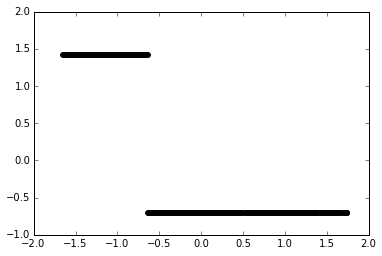

In [23]:

plt.scatter(X_train, Y_train,  color='black')

#plt.plot(X_test, pred, color='blue',linewidth=3)
plt.show()

##Transfer

In [351]:
datos1 = pd.read_csv("regLin4.csv")
datos1.head()

datos1.describe()

,X,y
count,1029.000000,1029.000000
mean,48.589544,0.325559
std,29.227099,0.468811
min,0.110611,0.000000
25%,22.625683,0.000000
50%,46.887538,0.000000
75%,74.247858,1.000000
max,99.983493,1.000000


In [352]:
X_train, X_test, Y_train, Y_test = train_test_split(datos1['X'],datos1[['y']], train_size=0.75)

In [355]:
scaleX=preprocessing.StandardScaler()
scaleX.fit(X_train)
X_train1=scaleX.transform(X_train)
X_train2=pd.DataFrame(X_train1,index=X_train.index,columns=['X'])
X_train=X_train2
print X_train.head()


            X
250 -0.168241
959  1.242241
595  1.370826
792 -1.239049
30   1.415391


In [356]:
print Y_train.head()

     y
250  0
959  0
595  0
792  1
30   0


In [327]:
#np.array(Y_train)

#df = pd.DataFrame({'X':X_train,'y':np.array(Y_train)})
#df.head()



,X,y
0,0.987332,0
1,0.822390,0
2,0.415981,0
3,0.631576,0
4,0.733348,0


In [357]:
def salida(w0,x):
    if w0[1]*x + w0[0] < 0:
        val=0
    else:
        val=1
    return val

In [359]:
w0=[rnd.random() for i in range(2)]

for i in X_train.index:
    error=Y_train.y[i]-salida(w0,X_train.X[i])
        #w0[0]=w0[0]+etha*error-l*w0[0]
        #w0[1]=w0[1]+etha*error*X_train[i]-l*w0[1]
error

-1

In [365]:
#corregir codigo para que spea si es una o varias variables


def entrena(X_train,y_train,w0,l=0.0,etha=0.01):
    for i in X_train.index:
        error=y_train.y[i]-salida(w0,X_train.X[i])
        w0[0]=w0[0]+etha*error-l*w0[0]
        w0[1]=w0[1]+etha*error*X_train.X[i]-l*w0[1]
    return w0

In [366]:
w=[rnd.random() for i in range(2)]


w=entrena(X_train,Y_train,w)
w

[-0.045378614587451918, -0.084863345712131819]

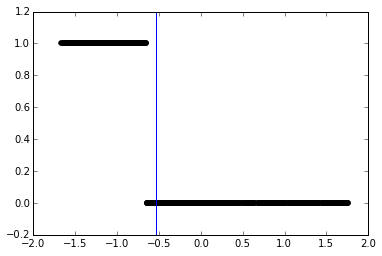

In [368]:
#

#print -w[0]/w[1]
#plt.axvline(-w[0]/w[1])



#plt.plot(X_test, pred, color='blue',linewidth=3)
#plt.show()

#yo.index = X_train.index
#xb=[]
#for i in X_train.index:
#     xb.append(w[1]*X_train.X[i] + w[0])

        
plt.scatter(X_train.X, Y_train.y,  color='black')
plt.axvline(-w[0]/w[1])
plt.show()
#